**Importing necessary libraries**

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("BlackFridaySales.csv")
data.head()
data.shape
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB



**Count missing values**

In [71]:
data.isnull().sum()


,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


**Percentage of missing data**

In [72]:
data.isnull().sum()/data.shape[0]*100


,0
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,31.566643


**Unique entries per column**

In [73]:
data.nunique()


,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


**Explore Purchase variable**

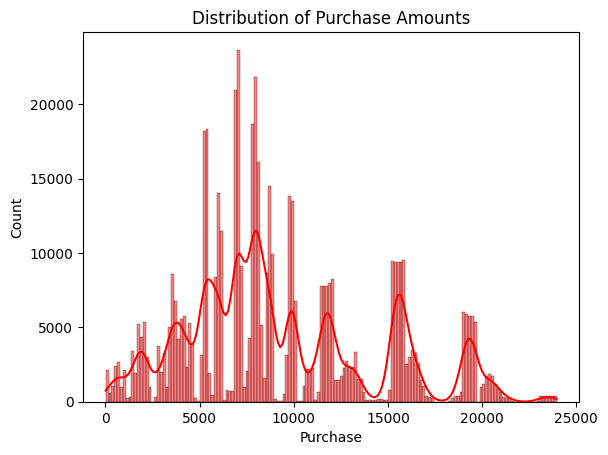

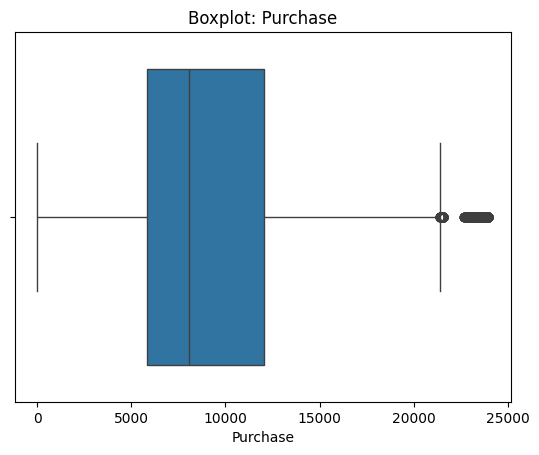

Skewness: 0.6001400037087128
Kurtosis: -0.3383775655851702


In [74]:
sns.histplot(data["Purchase"], color='red', kde=True)
plt.title("Distribution of Purchase Amounts")
plt.show()

sns.boxplot(x=data["Purchase"])
plt.title("Boxplot: Purchase")
plt.show()

print("Skewness:", data["Purchase"].skew())
print("Kurtosis:", data["Purchase"].kurtosis())

**Gender distribution**

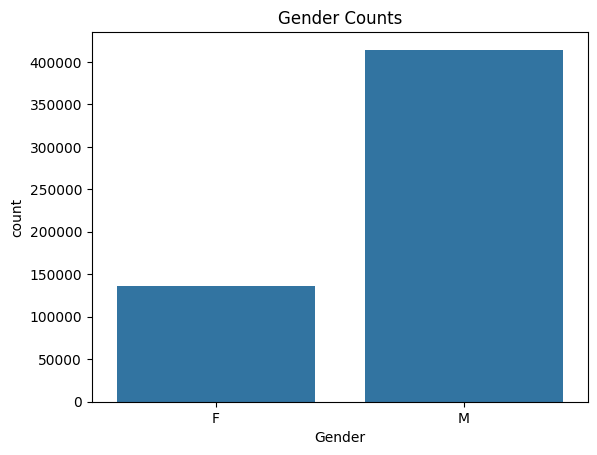

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [75]:
sns.countplot(x="Gender", data=data)
plt.title("Gender Counts")
plt.show()

data.groupby("Gender")["Purchase"].mean()


**Marital status counts**

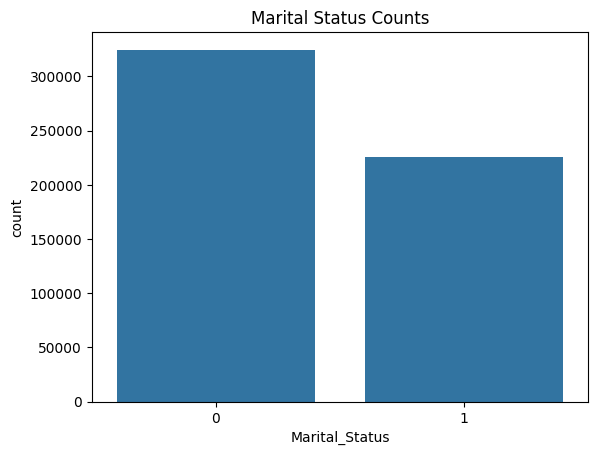

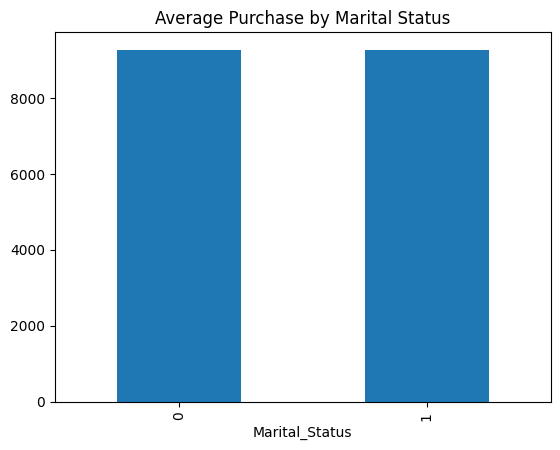

In [76]:
sns.countplot(x="Marital_Status", data=data)
plt.title("Marital Status Counts")
plt.show()

data.groupby("Marital_Status")["Purchase"].mean().plot(kind='bar')
plt.title("Average Purchase by Marital Status")
plt.show()

**Occupation counts**

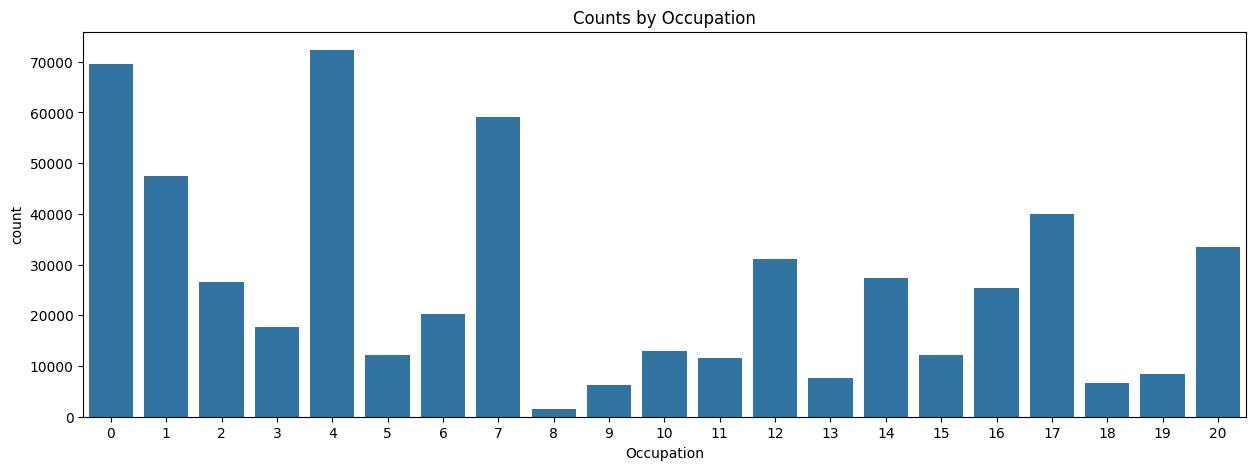

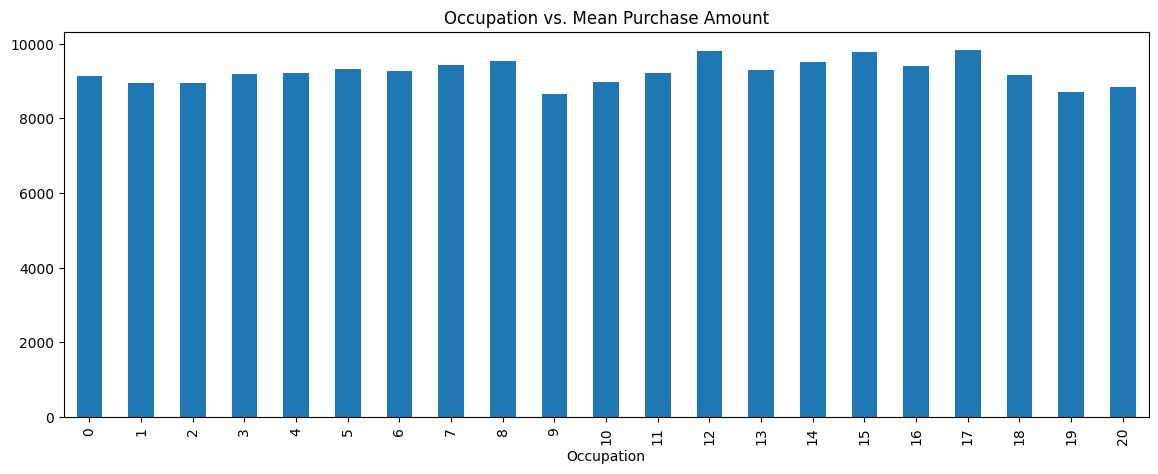

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(x="Occupation", data=data)
plt.title("Counts by Occupation")
plt.show()
occup_means = data.groupby("Occupation")["Purchase"].mean()
occup_means.plot(kind='bar', figsize=(14,5))
plt.title("Occupation vs. Mean Purchase Amount")
plt.show()

**City category distribution**

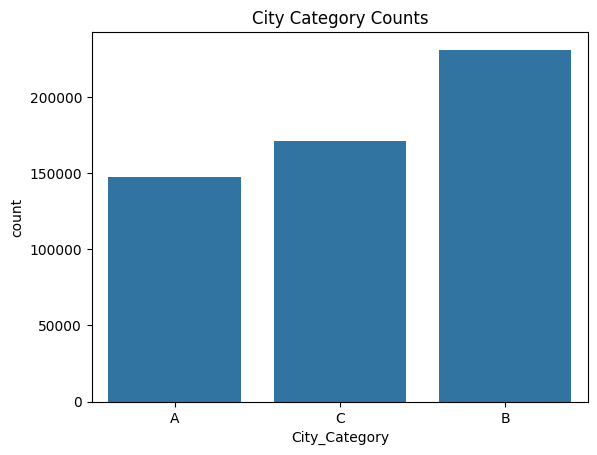

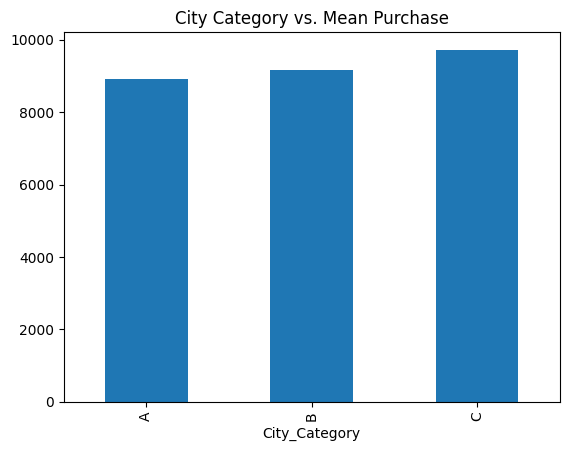

In [78]:
sns.countplot(x="City_Category", data=data)
plt.title("City Category Counts")
plt.show()

data.groupby("City_Category")["Purchase"].mean().plot(kind='bar')
plt.title("City Category vs. Mean Purchase")
plt.show()

**Stay years distribution**

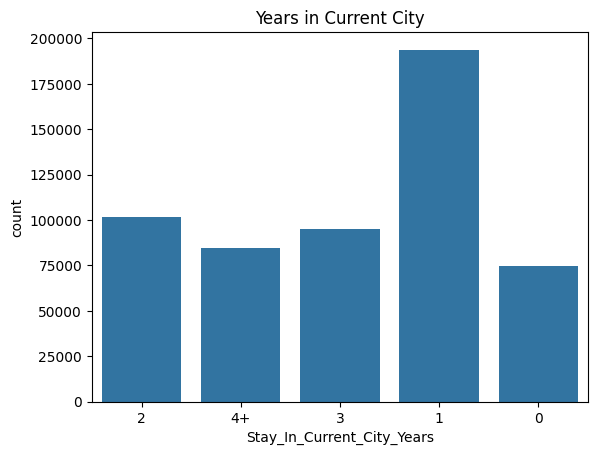

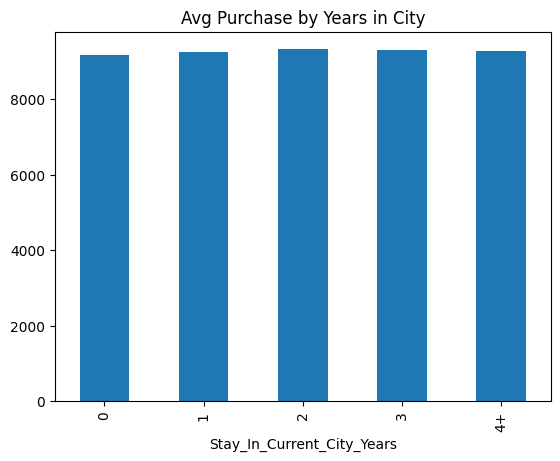

In [79]:
sns.countplot(x="Stay_In_Current_City_Years", data=data)
plt.title("Years in Current City")
plt.show()

data.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind='bar')
plt.title("Avg Purchase by Years in City")
plt.show()

**Age distribution**

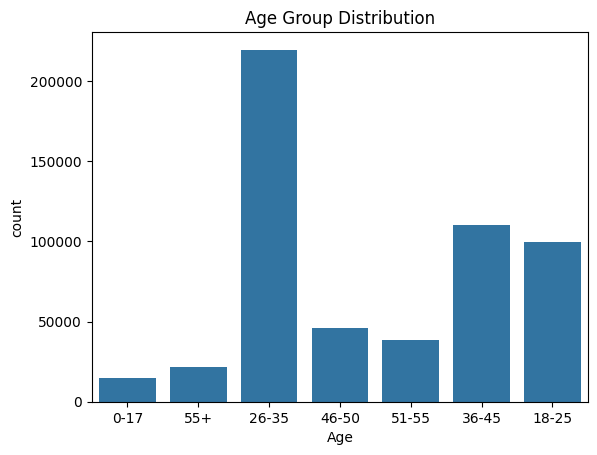

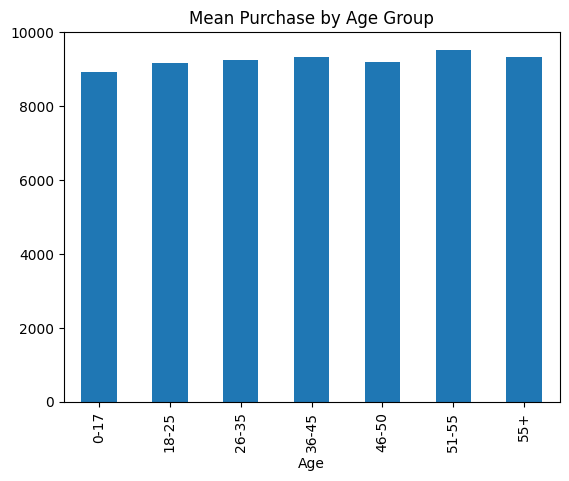

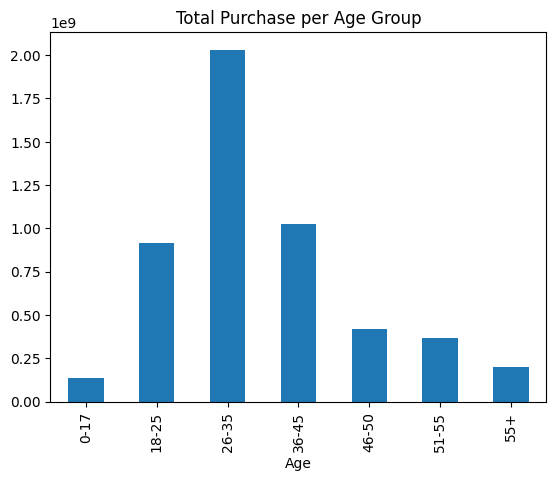

In [80]:
sns.countplot(x="Age", data=data)
plt.title("Age Group Distribution")
plt.show()

data.groupby("Age")["Purchase"].mean().plot(kind='bar')
plt.title("Mean Purchase by Age Group")
plt.show()

data.groupby("Age")["Purchase"].sum().plot(kind='bar')
plt.title("Total Purchase per Age Group")
plt.show()

**Product Category 1 counts**

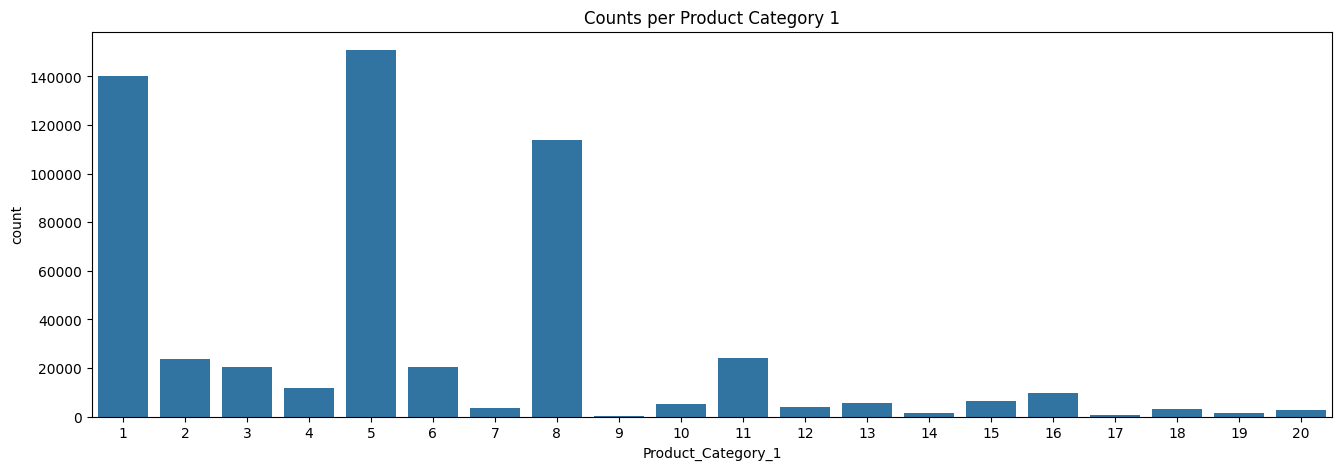

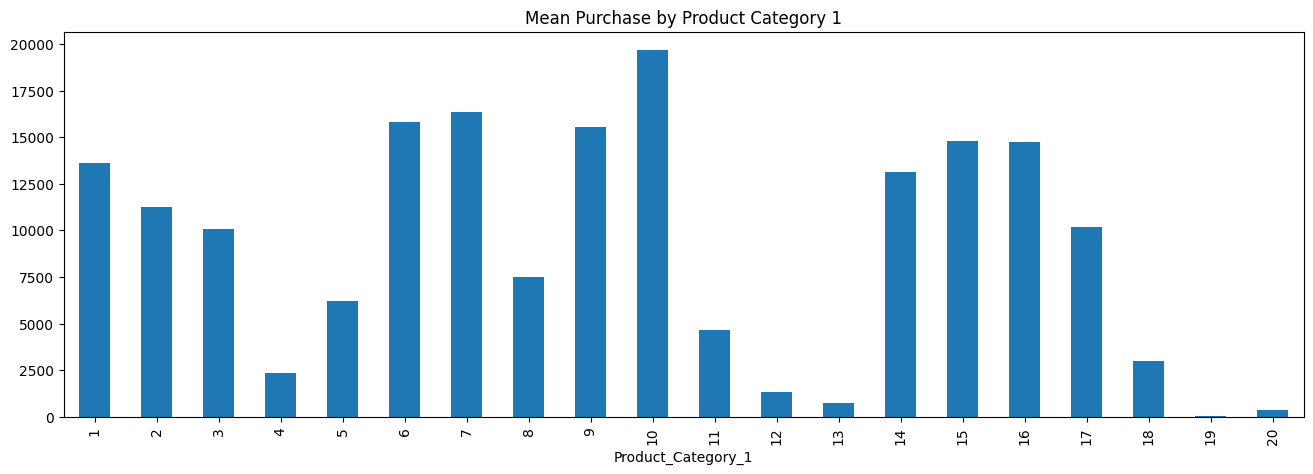

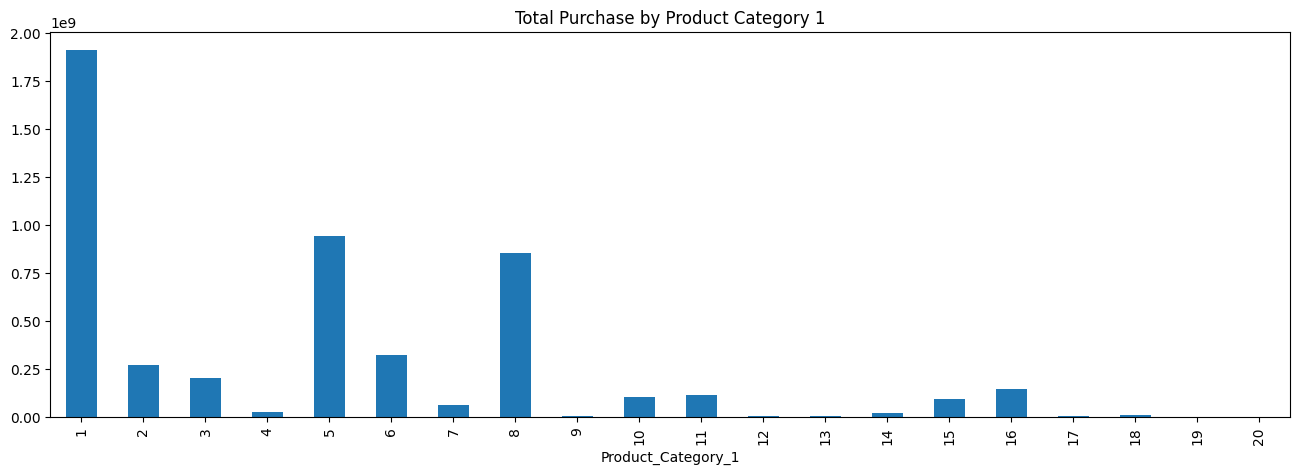

In [81]:
plt.figure(figsize=(16,5))
sns.countplot(x="Product_Category_1", data=data)
plt.title("Counts per Product Category 1")
plt.show()

# Mean purchase per Product_Category_1
data.groupby("Product_Category_1")["Purchase"].mean().plot(kind='bar', figsize=(16,5))
plt.title("Mean Purchase by Product Category 1")
plt.show()

# Total purchase per Product_Category_1
data.groupby("Product_Category_1")["Purchase"].sum().plot(kind='bar', figsize=(16,5))
plt.title("Total Purchase by Product Category 1")
plt.show()

**Product Category 2 and 3 counts**

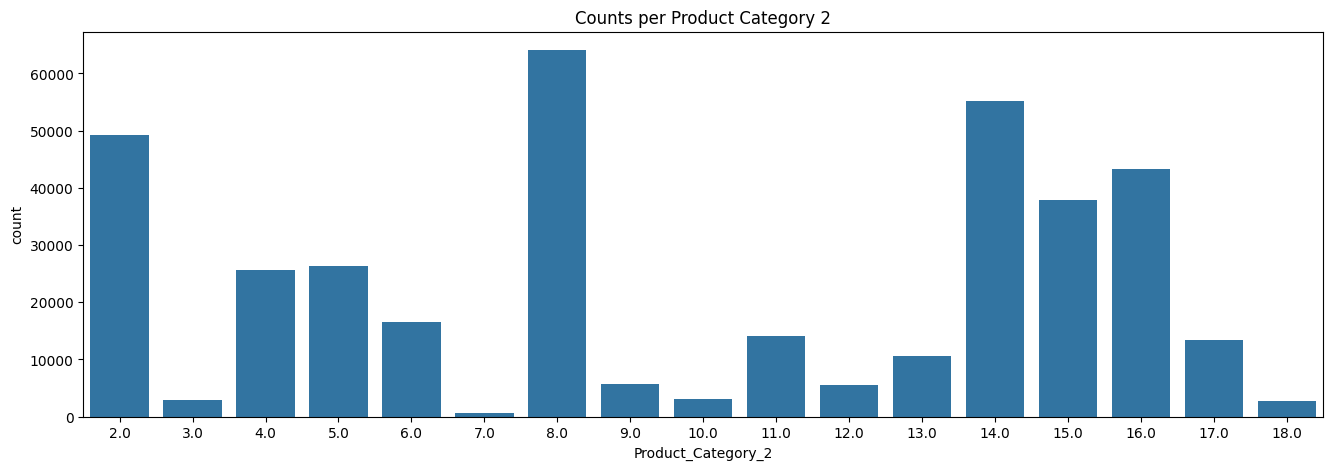

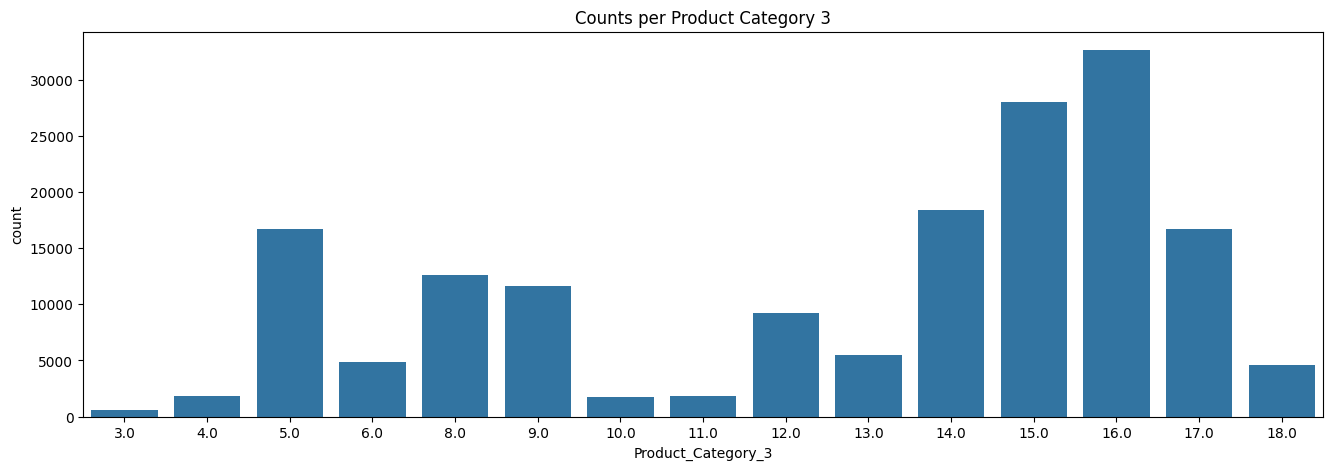

In [82]:
plt.figure(figsize=(16,5))
sns.countplot(x="Product_Category_2", data=data)
plt.title("Counts per Product Category 2")
plt.show()

plt.figure(figsize=(16,5))
sns.countplot(x="Product_Category_3", data=data)
plt.title("Counts per Product Category 3")
plt.show()

**Correlation matrix**

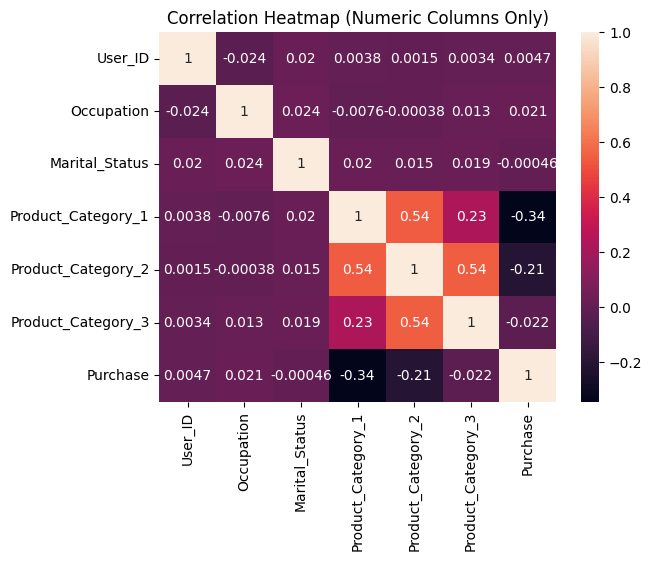

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [83]:
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Visualize the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

# Display column names
print(data.columns)

# Create a copy
df = data.copy()
df.head()

# Create dummy variables for Stay_In_Current_City_Years
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

**Encode categorical features**

In [94]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df['Gender'] = lr.fit_transform(df['Gender'])
df['Age'] = lr.fit_transform(df['Age'])
df['City_Category'] = lr.fit_transform(df['City_Category'])

df.head()

df['Product_Category_2'] = df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] = df['Product_Category_3'].fillna(0).astype('int64')

df.isnull().sum()

#Dropping the irrelevant columns
df = df.drop(['User_ID', 'Product_ID'], axis=1, errors='ignore')

# Splitting data into independent and dependent variables
X = df.drop('Purchase', axis=1)
y = df['Purchase']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

# Show the split info
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (385047, 13)
X_test shape: (165021, 13)
y_train shape: (385047,)
y_test shape: (165021,)


**Linear Regression**

In [85]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

Linear Regression Metrics:
MAE: 3532.069226165843
RMSE: 4625.781368526566
R2: 0.15192944521481688


**Decision Tree Regressor**

In [86]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\nDecision Tree Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("R2:", r2_score(y_test, y_pred_tree))



Decision Tree Metrics:
MAE: 2372.0357559134654
RMSE: 3361.633452177241
R2: 0.5521191505924365


**Random Forest Regressor**

In [87]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)
y_pred_rf = forest.predict(X_test)

print("\nRandom Forest Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))


Random Forest Metrics:
MAE: 2222.049109204734
RMSE: 3051.35541573242
R2: 0.6309821516972987


**XGBoost Regressor**

In [88]:
!pip install xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2:", r2_score(y_test, y_pred_xgb))


XGBoost Metrics:
MAE: 2141.713623046875
RMSE: 2870.746418616594
R2: 0.6733734607696533
